# 20161014 - SPY IV SMILE

In [1]:
import sys
sys.path.append(r'E:\Datos\python\python35\Proyectos\Eclipse Workspace\options\src')
sys.path.append(r'E:\Datos\python\python35\Proyectos\Eclipse Workspace\PlotSignal\src')
sys.path.append(r'E:\Datos\python\python35\Proyectos\Eclipse Workspace\PrintPlot\src')
sys.path.append(r'E:\Datos\python\python35\Proyectos\Eclipse Workspace\PlotSignal\src')
sys.path.append(r'E:\Datos\python\python35\Proyectos\Eclipse Workspace\Options\src')
trade_data_path = r'E:\Datos\jupyter notebooks\trading\data\\'
from PlotSignal.Csv_mngt import Csv_mngt
from  PlotSignal.PrintPlot import PrintPlot
from PlotSignal.PrintTrading import PrintTrading
import numpy as np
import mpld3
from datetime import datetime, time
from matplotlib.dates import  date2num
from Options.Value import Calculate
%matplotlib inline
mpld3.enable_notebook()

## INPUT DATA

In [2]:
###################################################################################################################
csv_file = '20161014 SPY IV smile data.csv'
###################################################################################################################

data_csv = Csv_mngt()
data_csv.set_data(trade_data_path + csv_file,';')

smile_file = data_csv.extract_data_row('FIELD','smile_file','VALUE')
print('smile_file = ' + smile_file)
smile_file_path = data_csv.extract_data_row('FIELD','smile_file_path','VALUE')
print('smile_file_path = ' + smile_file_path)
option_type = data_csv.extract_data_row('FIELD','option_type','VALUE')
print('option_type = ' + option_type)
expiration = datetime(int(data_csv.extract_data_row('FIELD','expiration_yy','VALUE')),
                      int(data_csv.extract_data_row('FIELD','expiration_mm','VALUE')),
                      int(data_csv.extract_data_row('FIELD','expiration_dd','VALUE')), 16, 0, 0)
print('expiration = ' + str(expiration))
entry_date = datetime(int(data_csv.extract_data_row('FIELD','entry_date_yy','VALUE')),
                      int(data_csv.extract_data_row('FIELD','entry_date_mm','VALUE')),
                      int(data_csv.extract_data_row('FIELD','entry_date_dd','VALUE')))
print('entry_date = ' + str(entry_date))
trading_day = entry_date.date()
print('trading_day = ' + str(trading_day))
ticker = data_csv.extract_data_row('FIELD','ticker','VALUE')
print('ticker = ' + str(ticker))
historical_volatility = float(data_csv.extract_data_row('FIELD','historical_volatility','VALUE').replace(',','.'))
print('historical_volatility = ' + str(historical_volatility))

smile_file = 20161014 SPY
smile_file_path = E:\\Datos\\bolsa\\cuenta personal\\analisis de valores\\Trades activos\\Scanning\\20161014
option_type = put
expiration = 2016-10-21 16:00:00
entry_date = 2016-10-14 00:00:00
trading_day = 2016-10-14
ticker = SPY
historical_volatility = 0.4376


### Get Data

In [3]:
csv = Csv_mngt()
csv.set_data(smile_file_path + '\\Tablas\\' + smile_file + '.txt',';')
# clean up of the csv deleting rows with no time entry
time_list=csv.extract_data_col('Time')
for each in time_list:
    try:
        time_conversion=datetime.strptime(each, '%H:%M:%S')
    except ValueError:
        csv.delete_data_row('Time',each)
time_list=csv.extract_data_col('Time')
bid_str = csv.extract_data_col('Bid Underlier')
for i, each in enumerate(bid_str):
    try:
        bid_str[i]=float(each.replace(',','.'))
    except ValueError:
        if i:
            bid_str[i] = bid_str[i-1]
        else:
            bid_str[i] = 0
    finally:
        if bid_str[i] == 0 and i > 0:
            bid_str[i] = bid_str[i-1]
bid_list = np.asarray(bid_str)
ask_str = csv.extract_data_col('Ask Underlier')
for i, each in enumerate(ask_str):
    try:
        ask_str[i]=float(each.replace(',','.'))
    except ValueError:
        if i:
            ask_str[i] = ask_str[i-1]
        else:
            ask_str[i] = 0
    finally:
        if ask_str[i] == 0 and i > 0:
            ask_str[i] = ask_str[i-1]
ask_list = np.asarray(ask_str)

# get the list of strikes
strike_str = csv.extract_data_col('Strike')
for i, each in enumerate(strike_str):
    try:
        strike_str[i]=float(each.replace(',','.'))
    except ValueError:
        if i:
            strike_str[i] = strike_str[i-1]
        else:
            strike_str[i] = 0
    finally:
        if strike_str[i] == 0 and i > 0:
            strike_str[i] = strike_str[i-1]
strike_list = np.asarray(strike_str)
strikes = sorted(set(strike_list), reverse=True)
print('Strikes detected: ' + str(strikes))
target_str = csv.extract_data_col('Target')
clean_target_str = []
for each in target_str:
    try:
        clean_target_str.append(float(each.replace(',','.')))
    except ValueError:
        clean_target_str.append(0)
target_list = np.asarray(clean_target_str)
time_list = csv.date2num_list(time_list, '%H:%M:%S')-0.25
time_list = time_list - int(time_list[0]) + date2num(trading_day)
print(date2num(trading_day))
under_price = (bid_list + ask_list) / 2
bid_option_str = csv.extract_data_col('Bid')
bid_option = np.asarray([float(x.replace(',','.')) for x in bid_option_str])
ask_option_str = csv.extract_data_col('Ask')
ask_option = np.asarray([float(x.replace(',','.')) for x in ask_option_str])

Strikes detected: [225.0, 224.5, 224.0, 223.5, 223.0, 222.5, 222.0, 221.5, 221.0, 220.5, 220.0, 219.5, 219.0, 218.5, 218.0, 217.5, 217.0, 216.5, 216.0, 215.5, 215.0, 214.5, 214.0, 213.5, 213.0, 212.5, 212.0, 211.5, 211.0, 210.5, 210.0, 209.0, 208.0, 207.5, 207.0, 206.0, 205.0, 204.0, 203.0, 202.5, 202.0]
736251.0


## ASK & BID

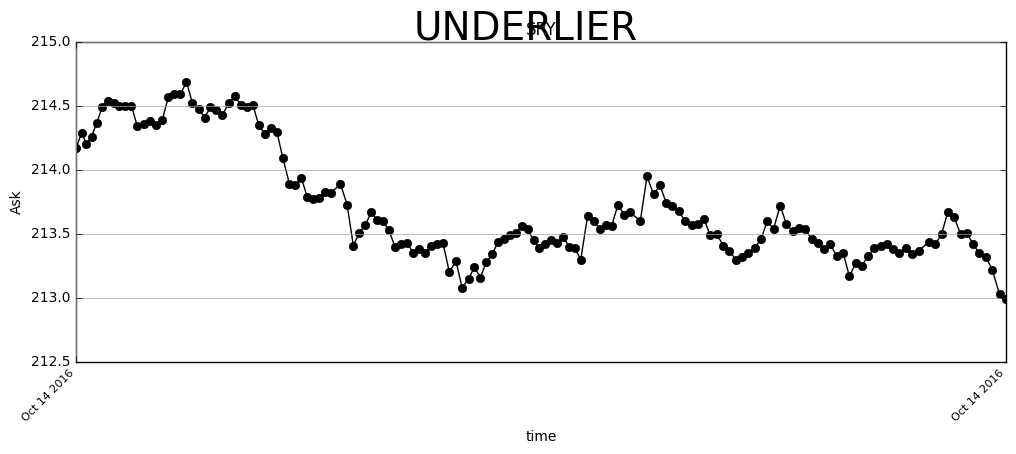

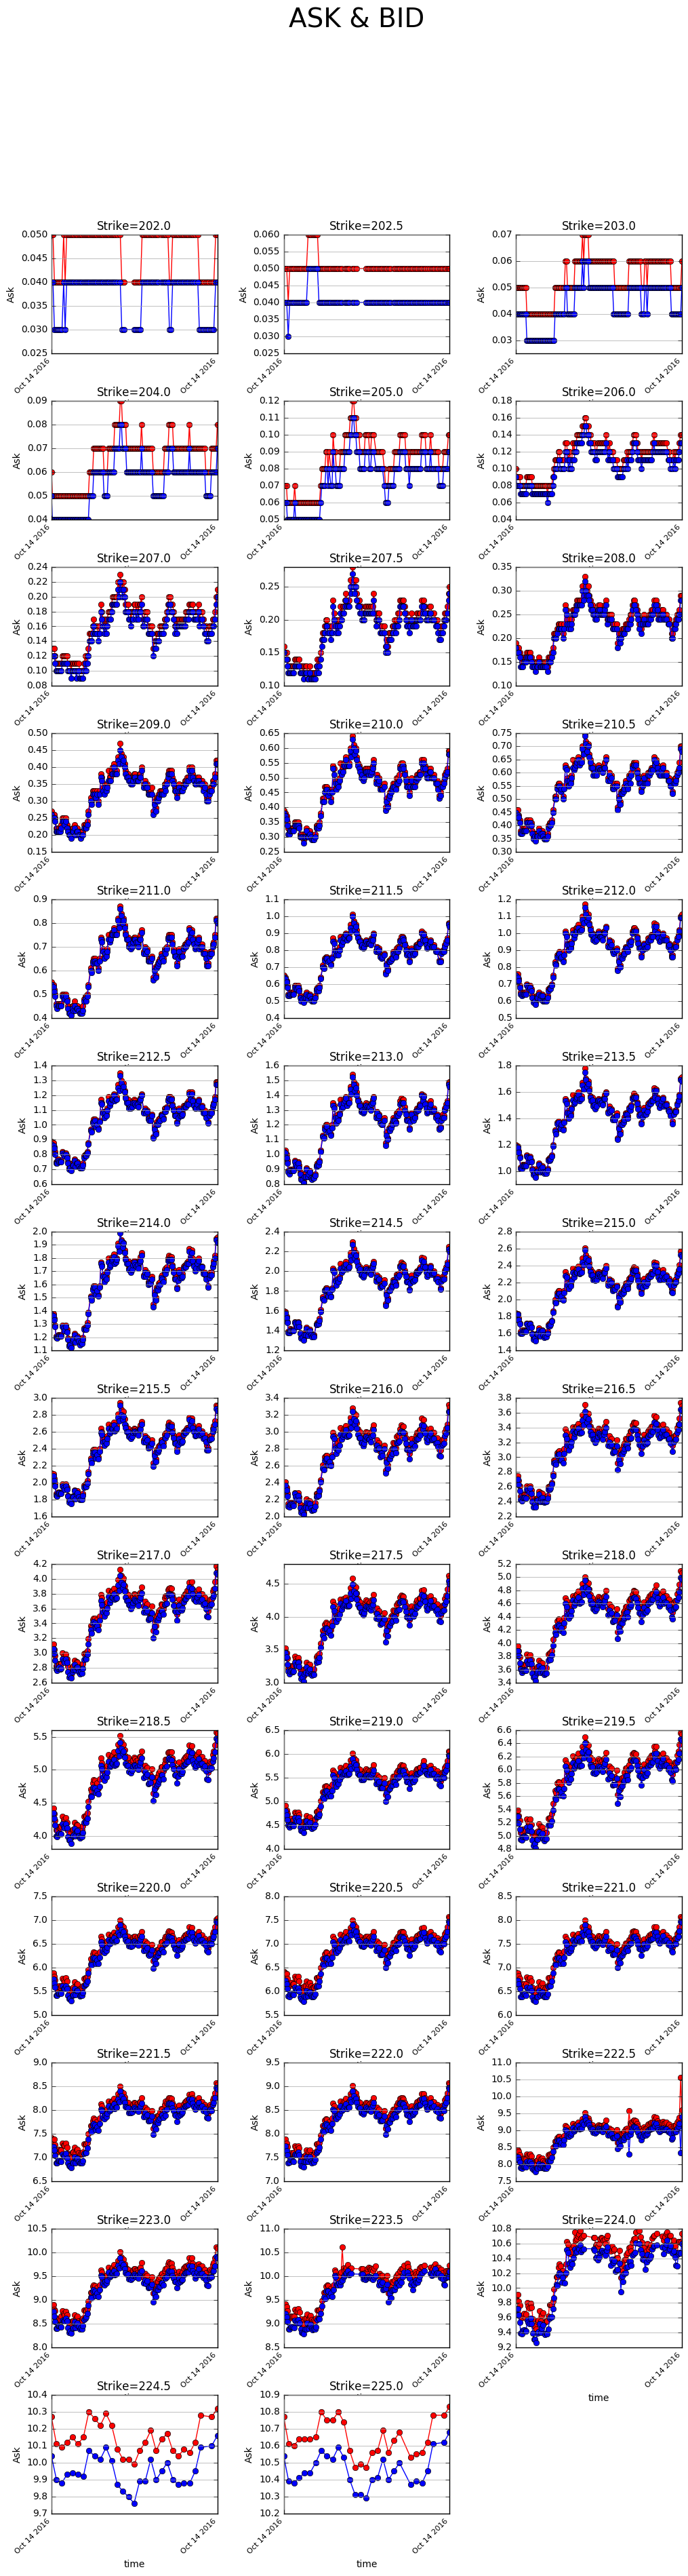

entry_date = 2016-10-14 00:00:00
underlying open = 214.17
underlying close = 212.99


In [4]:
clean_time_list = []
clean_ask_underlier = []
for i,v in enumerate(time_list):
    if v not in clean_time_list:
        clean_time_list.append(v)
        clean_ask_underlier.append(ask_list[i])
clean_time_list = np.asarray(clean_time_list)
clean_ask_underlier = np.asarray(clean_ask_underlier)
graph_underlier = PrintPlot(fig_size = (12, 4), nrows = 1, ncols = 1, figure_title = "UNDERLIER")
graph_underlier.init_plot(clean_time_list, clean_ask_underlier, trace_type = 'ko-', data_name = 'Ask' , x_name = 'time',
                               title_plot = ticker, log_y = False, nplot = 1,
                               show_legend = False)



strikes = sorted(set(strike_list), reverse=True)
strike_time = []
ask_value = []
n_graphs = len(strikes)
n_rows = int(n_graphs ** 0.5)
n_cols = int(n_graphs / n_rows)
if n_cols < 4:
    if (n_graphs % n_rows):
        n_cols += 1
else:
    n_cols = 3
    n_rows = int(n_graphs / n_cols) + 1
figure_height = n_rows * 3
graph_option_ask = PrintPlot(fig_size = (12, figure_height), nrows = n_rows, ncols = n_cols, figure_title = "ASK & BID")
    
for ngraphs in range(1,n_graphs+1):
    strike_value = strikes.pop()
    strike_time = []
    ask_value = []
    bid_value = []
    for i,v in enumerate(strike_list):
        if v == strike_value:
            strike_time.append(time_list[i])
            ask_value.append(ask_option[i])
            bid_value.append(bid_option[i])
    strike_time = np.asarray(strike_time)
    ask_value = np.asarray(ask_value)
    bid_value = np.asarray(bid_value)
    graph_option_ask.init_plot(strike_time, ask_value, trace_type = 'ro-', data_name = 'Ask' , x_name = 'time',
                               title_plot = 'Strike=' + str(strike_value), log_y = False, nplot = ngraphs,
                               show_legend = False)
    graph_option_ask.append_trace(bid_value, trace_type = 'bo-', trace_name = 'Bid')
    
graph_option_ask.show()
print('entry_date = ' + str(entry_date))
print('underlying open = ' + str(ask_list[0]))
print('underlying close = ' + str(ask_list[-1]))

## IV smiles

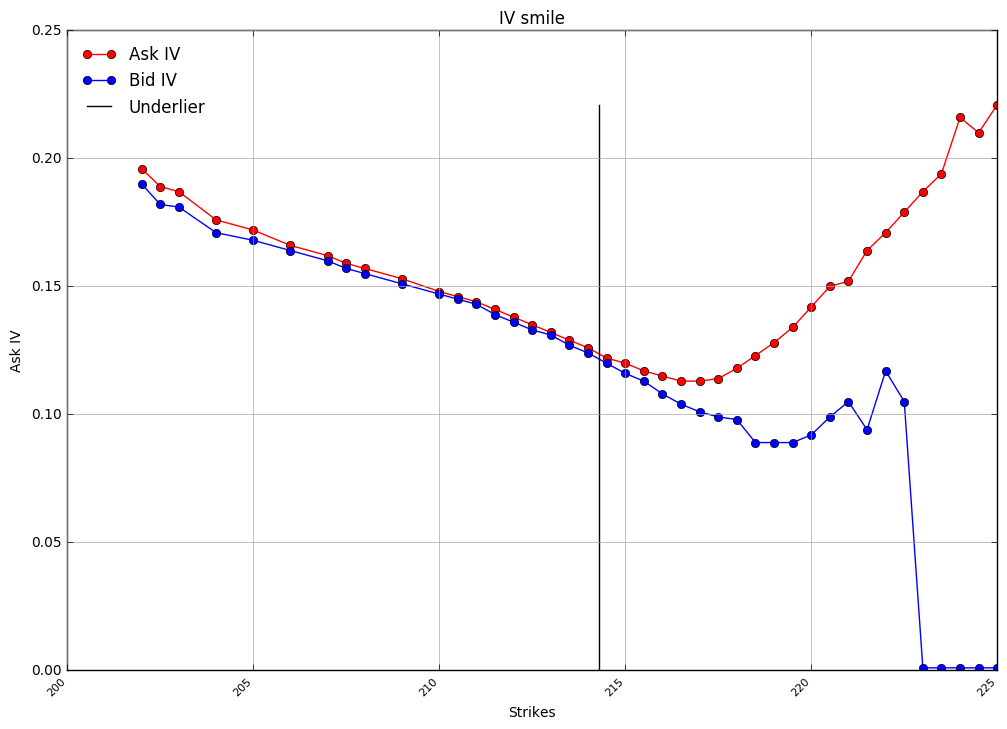

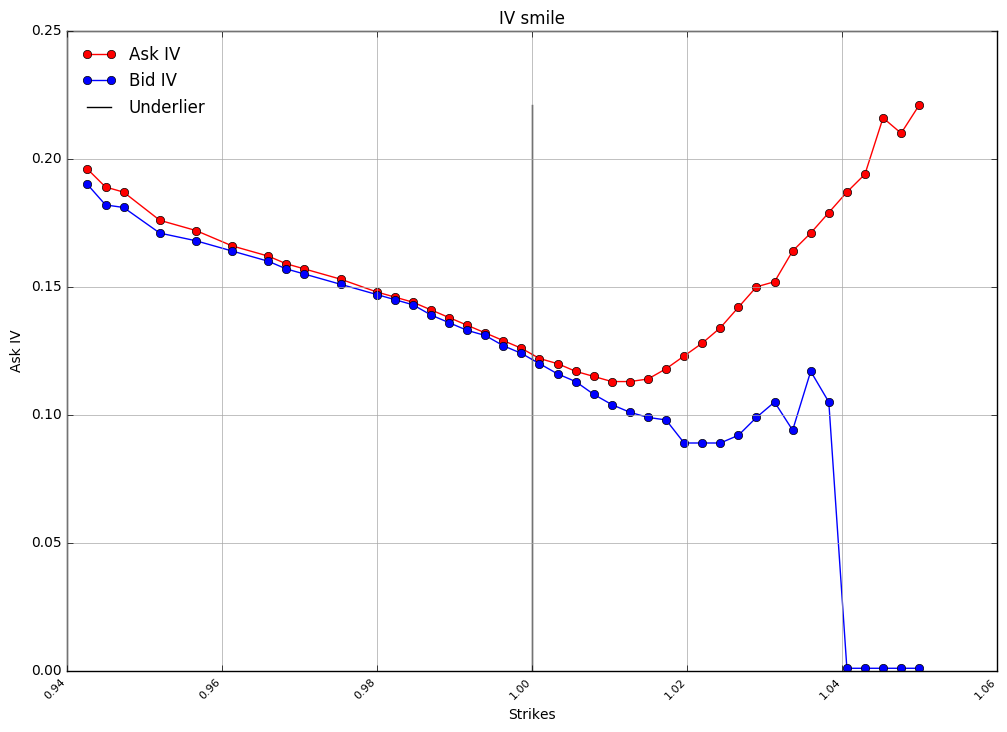

In [5]:
strikes = sorted(set(strike_list))
time_IV_time = datetime.combine(trading_day, time(12,0,0))
time_IV = date2num(time_IV_time)
ask_IV_list, bid_IV_list, strike_value_list, under_IV_list  = [], [], [], []
for strike_IV in strikes:
    ask_value, bid_value, strike_time, under_value  = [], [], [], []
    # extract the strike information from the data
    for i,v in enumerate(strike_list):
        if v == strike_IV:        
            strike_time.append(time_list[i])
            under_value.append(ask_list[i])
            ask_value.append(ask_option[i])
            bid_value.append(bid_option[i])
    # look for the closest point to time_IV
    is_found = False;
    for i, v in enumerate(strike_time):
        if time_IV < v:
            is_found = True
            break
    # calculate closest point
    if not is_found:
        under_IV=under_value[-1]
        ask_IV=ask_value[-1]
        bid_IV=bid_option[-1]
        time_IV=strike_time[-1]
    elif i==0:
        under_IV=under_value[0]
        ask_IV=ask_value[0]
        bid_IV=bid_option[0]
        time_IV=strike_time[0]
    else:
        # extrapolation
        m = (under_value[i] - under_value[i-1]) / (strike_time[i] - strike_time[i-1])
        under_IV = m * (time_IV-strike_time[i-1]) + under_value[i-1]

        m = (ask_value[i] - ask_value[i-1]) / (strike_time[i] - strike_time[i-1])
        ask_IV = m * (time_IV-strike_time[i-1]) + ask_value[i-1]

        m = (bid_value[i] - bid_value[i-1]) / (strike_time[i] - strike_time[i-1])
        bid_IV = m * (time_IV-strike_time[i-1]) + bid_value[i-1]
    time_to_exp = date2num(expiration)-time_IV
    under_IV_list.append(under_IV)
    ask_IV_list.append(Calculate().find_IV(option_type, ask_IV, under_IV, strike_IV, time_to_exp))
    bid_IV_list.append(Calculate().find_IV(option_type, bid_IV, under_IV, strike_IV, time_to_exp))
    strike_value_list.append(strike_IV)
graph_IV = PrintPlot(fig_size=(12,8))
graph_IV.init_plot(np.asarray(strike_value_list), np.asarray(ask_IV_list), trace_type = 'ro-', data_name = 'Ask IV',
                   x_name = 'Strikes', title_plot = 'IV smile', are_dates = False)
graph_IV.append_trace(np.asarray(bid_IV_list), trace_type = 'bo-', trace_name = 'Bid IV')
graph_IV.append_signal(np.asarray([under_IV, under_IV]), np.asarray([0, np.max([np.max(bid_IV_list),np.max(ask_IV_list)]) ]),
                       trace_type = 'k-', trace_name = 'Underlier')
graph_IV.show()

# Normalized graph
graph_IV_norm = PrintPlot(fig_size=(12,8))
strike_value_list_norm = np.asarray(strike_value_list) / under_IV
graph_IV_norm.init_plot(strike_value_list_norm, np.asarray(ask_IV_list), trace_type = 'ro-', data_name = 'Ask IV',
                   x_name = 'Strikes', title_plot = 'IV smile', are_dates = False)
graph_IV_norm.append_trace(np.asarray(bid_IV_list), trace_type = 'bo-', trace_name = 'Bid IV')
graph_IV_norm.append_signal(np.asarray([1, 1]),
                            np.asarray([0, np.max([np.max(bid_IV_list),np.max(ask_IV_list)]) ]),
                            trace_type = 'k-', trace_name = 'Underlier')
graph_IV_norm.show()
